<a href="https://colab.research.google.com/github/jinhyukbae/playdata/blob/main/%EC%A1%B0%EB%B3%84%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data.csv")
df

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,TRAIN_0049995,20210909,목,2,2,107,중앙로,0,0,60.0,...,0,한남투자,33.252712,126.561124,없음,김약국,33.247607,126.561943,없음,31.0
49996,TRAIN_0049996,20211023,토,19,2,103,일반국도11호선,0,0,60.0,...,0,영주교,33.305359,126.598914,없음,하례입구삼거리,33.300796,126.600332,없음,50.0
49997,TRAIN_0049997,20210909,목,1,2,103,일반국도12호선,0,0,80.0,...,0,오돌또기,33.476123,126.382742,없음,구엄교,33.477747,126.387803,없음,57.0
49998,TRAIN_0049998,20211212,일,1,2,103,일반국도12호선,0,0,70.0,...,0,청송낚시,33.263593,126.623204,있음,효례교,33.263624,126.623943,없음,47.0


# 개요
  - id: 칼럼id -제거-
  - base_date: 날짜     -제거-
  - day_of_week: 요일         라벨로 변경
  - base_hour: 시간대
  - lane_count: 차로수
  - road_rating: 도로 등급       (106:지방도,103:일반국도,107:시도,군도)로 구성
  - road_name: 도로 이름
  - multi_linked: 중용구간 여부(0,1)로 구성  ->0개수:4698978 1개수:2239 -제거-
  - connect_code: 연결로 코드         (0,103)로 구성
  - maximum_speed_limit: 최고속도 제한       타겟과의 상관 관계가 제일 높음
  - vehicle_restricted: 통과제한 차량   (값이 한개임) -제거-
  - weight_restricted: 통과제한 하중         타겟과의 상관 관계가 두번째로 높음
  - height_restricted: 통과 제한 높이    (값이 한개임) -제거-
  - road_type: 도로 유형                     (0,3) 으로 구성 타겟과의 상관 관계가 세번재로 높음
  - start_node_name: 시작지점명            온핫 인코딩 사용?
  - start_latitude: 시작지점 위도
  - start_longitude: 시작지점 경도
  - start_turn_restricted: 시작 지점의 회전제한 유무      (있음,없음)으로 구성
  - end_node_name: 도착지점명             온핫 인코딩 사용?
  - end_latitude: 도착지점 위도
  - end_longitude: 도착지점 경도
  - end_turn_restricted: 도착 지점의 회전제한 유무    (있음,없음)으로 구성
  - target: 평균속도(km)


  1. 참조 https://www.law.go.kr/LSW/admRulInfoP.do?admRulSeq=2100000157569  (도로 규정)
  2. 참조 https://tttsss77.tistory.com/147 (위도, 경도로 지도 찾기)
  3. 참조 https://velog.io/@eodud0582/Folium 지도위에 표시(위도,경도 이용)
  4. 참조 https://bskyvision.com/entry/python-%EC%A3%BC%EC%86%8C%EB%A5%BC-%EC%9C%84%EB%8F%84-%EA%B2%BD%EB%8F%84-%EC%A2%8C%ED%91%9C%EB%A1%9C-%EB%B0%94%EA%BF%94%EC%A3%BC%EB%8A%94-Geocoder-API-%EC%82%AC%EC%9A%A9%EB%B2%95 도로명 주소로 (위도,경도 찾기)

In [4]:
df.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [5]:
# 더미화 하면 컬럼이 1000개 이상이 생김
# 라벨 인코딩을 사용 

# '-' 라는 게 있음

df.road_name.unique()

array(['지방도1112호선', '일반국도11호선', '일반국도16호선', '태평로', '일반국도12호선', '경찰로', '-',
       '외도천교', '일반국도99호선', '중정로', '번영로', '연동로', '중산간서로', '지방도1118호선',
       '새서귀로', '지방도1115호선', '지방도1132호선', '어시천교', '지방도1120호선', '삼무로',
       '애조로', '지방도1116호선', '일반국도95호선', '동부관광도로', '동홍로', '지방도97호선', '중문로',
       '연삼로', '중앙로', '산서로', '지방도1117호선', '연북로', '남조로', '지방도1119호선', '동문로',
       '한천로', '삼봉로', '고평교', '연북2교', '관광단지로', '권학로', '시청로', '신대로', '서사로',
       '관덕로', '관광단지1로', '신산로', '관광단지2로', '신광로', '지방도1136호선', '첨단로',
       '제2거로교', '시민광장로', '임항로', '수영장길', '애원로', '삼성로', '일주동로', '호서중앙로',
       '아봉로', '호근로'], dtype=object)

In [6]:
# 따로 삭제? 
# 라벨인코딩 하면 알아서 임의의 숫자로 지정해주니까 그냥 냅두기로
df[df["road_name"]=='-']


,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
6,TRAIN_0000006,20220106,목,0,2,107,-,0,0,60.0,...,0,가동,33.418412,126.268029,없음,나동,33.414175,126.269378,없음,39.0
14,TRAIN_0000014,20220203,목,16,1,107,-,0,0,60.0,...,3,송목교,33.316913,126.624634,없음,송목교,33.317065,126.623867,없음,58.0
28,TRAIN_0000028,20220612,일,14,2,107,-,0,0,50.0,...,0,광평교차로,33.330822,126.354179,없음,금악,33.330673,126.354987,없음,59.0
30,TRAIN_0000030,20220623,목,6,2,107,-,0,0,80.0,...,0,일호유리,33.472276,126.418443,없음,상귀교차로,33.473390,126.409129,없음,75.0
31,TRAIN_0000031,20211028,목,15,1,107,-,0,0,60.0,...,3,남수교,33.337244,126.695809,없음,남수교,33.337398,126.696117,없음,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,TRAIN_0049943,20220302,수,15,1,107,-,0,0,60.0,...,0,가는질,33.356829,126.264075,없음,우사,33.358358,126.271652,없음,54.0
49945,TRAIN_0049945,20220527,금,15,2,107,-,0,0,80.0,...,0,광삼교,33.472505,126.424368,없음,일호유리,33.472276,126.418443,없음,56.0
49947,TRAIN_0049947,20220121,금,19,2,107,-,0,0,50.0,...,0,창성세차장,33.409416,126.259139,없음,한림어촌계,33.411255,126.257313,없음,28.0
49954,TRAIN_0049954,20211105,금,13,2,107,-,0,0,50.0,...,0,한림수협냉동창고,33.415529,126.261797,없음,한수풀횟집,33.413560,126.259693,없음,34.0


In [7]:
# 필요없으니 사 ㄱ제함
df.drop(["vehicle_restricted", "height_restricted"], axis = 1, inplace = True)

In [8]:
# 0이 49969 1이 31
df.multi_linked.value_counts()

0    49969
1       31
Name: multi_linked, dtype: int64

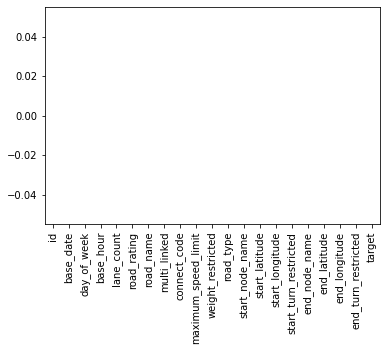

In [9]:
##결측치 확인
df.isnull().sum().plot(kind="bar")   ##null값 없음

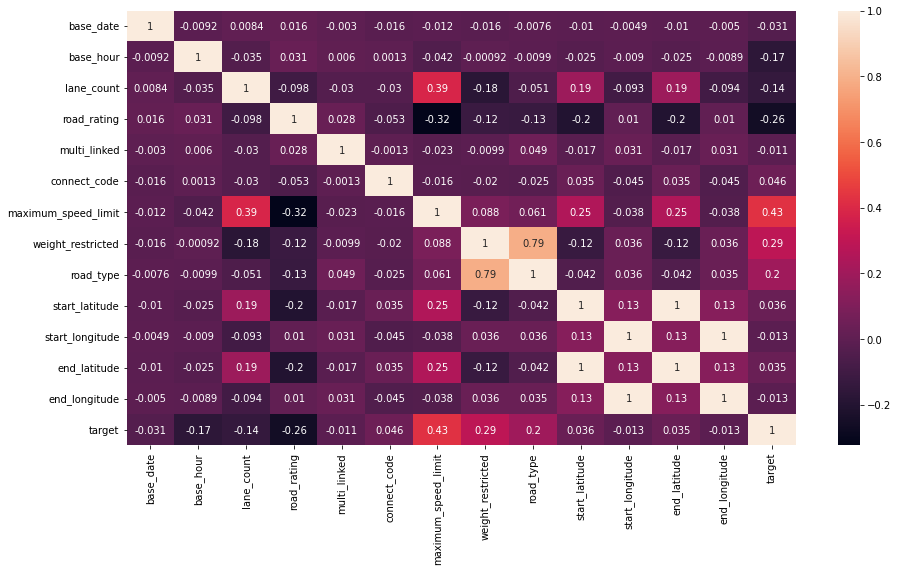

In [10]:
#상관관계도 확인
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True)
###최고 속도 제한이 제일 높음
###통과제한 하중 높이가 두번재
###도로 유형이 3번째
### 3개의 칼럼 확인

# 속도 제한maximum_speed_limit

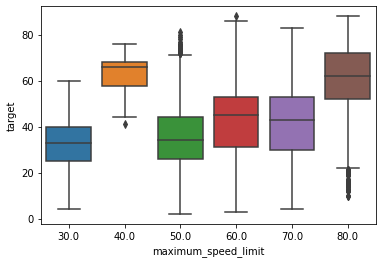

In [11]:
##속도제한이 50키로인데 80키로 넘게 달린다거나? 60인데 100넘게 달린다거나? 하는 아웃라이어 제거
sns.boxplot(x = "maximum_speed_limit", y = "target", data = df)

In [12]:
df[df["target"] >100] ##100km 이상달린값들 제거? (5건 존재)  ##10km이하 값들은 출퇴근시간에 너무 많음

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target


In [13]:
df2 = df[df["target"] <100].copy()

# 최대 하중 확인weight_restricted

In [14]:
df.weight_restricted.unique()

array([32400.,     0., 43200., 50000.])

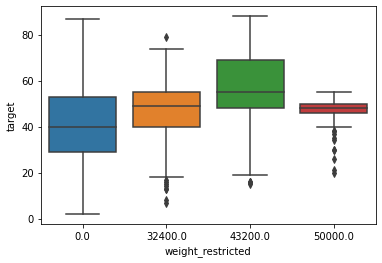

In [15]:
sns.boxplot(x='weight_restricted', y="target", data=df2)

weight_restricted
0.0        AxesSubplot(0.125,0.125;0.775x0.755)
32400.0    AxesSubplot(0.125,0.125;0.775x0.755)
43200.0    AxesSubplot(0.125,0.125;0.775x0.755)
50000.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: target, dtype: object

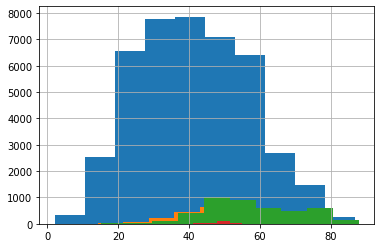

In [16]:
df2.groupby("weight_restricted")["target"].hist()

In [17]:
df2.groupby("weight_restricted")["target"].mean()  ###속도 제한이 없는경우 평균 속도가 떨어짐

weight_restricted
0.0        41.033206
32400.0    47.590191
43200.0    58.026419
50000.0    47.163551
Name: target, dtype: float64

# 도로 유형(road_type)

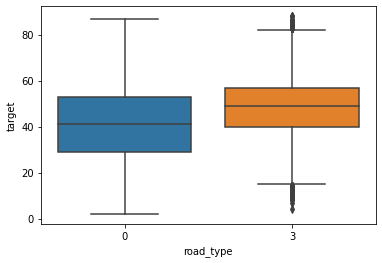

In [18]:
sns.boxplot(x='road_type', y="target", data=df2)

road_type
0    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: target, dtype: object

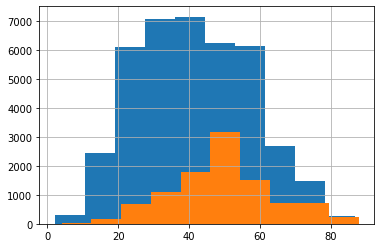

In [19]:
df2.groupby("road_type")["target"].hist()

In [20]:
df2.groupby("road_type")["target"].mean()
df2.groupby("road_type")["target"].std()

road_type
0    15.925824
3    14.456835
Name: target, dtype: float64

In [21]:
# multi_linked는 1과 0밖에 없고 데이터에 큰 영향이 없으므로 삭제 
# id 삭제
# base_date 삭제 
df2.drop(["multi_linked","id","base_date"], axis = 1, inplace = True)

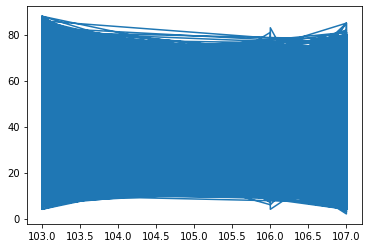

In [22]:
#road_rating 도로 등급 106 지방도 103 일반국도 107 시도 군도 
plt.plot(df["road_rating"],df["target"])

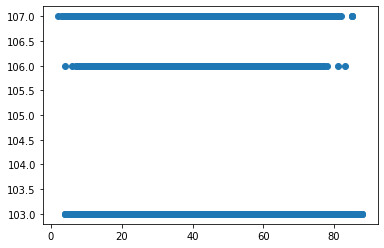

In [23]:
#road_rating 도로 등급 106 지방도 103 일반국도 107 시도 군도 
plt.scatter( df["target"], df["road_rating"])

# 전처리


In [24]:
from sklearn.preprocessing import LabelEncoder

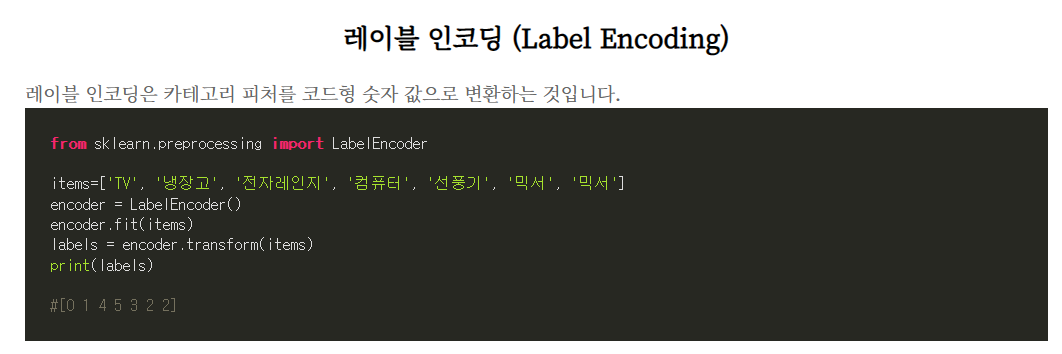

In [25]:
# 오브젝트 타입인 애들을 정수형으로 변환
chage_c = ["day_of_week","road_name", "start_node_name", "end_node_name",
           "start_turn_restricted", "end_turn_restricted", "weight_restricted", "road_rating",
           "road_type",]
for i in chage_c:
    le = LabelEncoder()
    le=le.fit(df2[i])
    df2[i]=le.transform(df2[i])

In [26]:
df2.head()

,day_of_week,base_hour,lane_count,road_rating,road_name,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,1,17,1,1,46,0,60.0,1,1,386,33.427747,126.662612,0,386,33.427749,126.662335,0,52.0
1,1,21,2,0,34,0,60.0,0,0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,30.0
2,4,7,2,0,36,0,80.0,0,0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,61.0
3,0,13,2,2,57,0,50.0,0,0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,20.0
4,6,8,2,0,35,0,80.0,0,0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,38.0
